In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import os

In [2]:
try:
    path = 'E:\\Data_Science\\OpenClassRoom\\Projet 6\\Flipkart'
    df=pd.read_csv(path + '\\flipkart_com-ecommerce_sample_1050.csv')
except FileNotFoundError:
    path = 'C:\\Users\\Nico Janko\\Documents\\Data_Science\\OpenClassRoom\\Projet 6\\Flipkart'
    df = pd.read_csv(path + '\\flipkart_com-ecommerce_sample_1050.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  1050 non-null   object 
 1   crawl_timestamp          1050 non-null   object 
 2   product_url              1050 non-null   object 
 3   product_name             1050 non-null   object 
 4   product_category_tree    1050 non-null   object 
 5   pid                      1050 non-null   object 
 6   retail_price             1049 non-null   float64
 7   discounted_price         1049 non-null   float64
 8   image                    1050 non-null   object 
 9   is_FK_Advantage_product  1050 non-null   bool   
 10  description              1050 non-null   object 
 11  product_rating           1050 non-null   object 
 12  overall_rating           1050 non-null   object 
 13  brand                    712 non-null    object 
 14  product_specifications  

# EDA

In [4]:
df['description']

0       Key Features of Elegance Polyester Multicolor ...
1       Specifications of Sathiyas Cotton Bath Towel (...
2       Key Features of Eurospa Cotton Terry Face Towe...
3       Key Features of SANTOSH ROYAL FASHION Cotton P...
4       Key Features of Jaipur Print Cotton Floral Kin...
                              ...                        
1045    Oren Empower Extra Large Self Adhesive Sticker...
1046    Wallmantra Large Vinyl Sticker Sticker (Pack o...
1047    Buy Uberlyfe Extra Large Pigmented Polyvinyl F...
1048    Buy Wallmantra Medium Vinyl Sticker Sticker fo...
1049    Buy Uberlyfe Large Vinyl Sticker for Rs.595 on...
Name: description, Length: 1050, dtype: object

In [5]:
df['product_category_0'] = df['product_category_tree'].apply(lambda x: x.split(' >> ')[0])
df['product_category_0'] = df['product_category_0'].apply(lambda x: x.replace('["',''))
print(df['product_category_0'].unique().shape[0])
df['product_category_1'] = df['product_category_tree'].apply(lambda x: x.split(' >> ')[1])
print(df['product_category_1'].unique().shape[0])

7
63


In [6]:
# select rows from categories with only 1 members
idx = list(df.groupby('product_category_1').filter(lambda x: len(x) < 4).index)
df = df.drop(index = idx)
label_0_unique = df['product_category_0'].unique().shape[0]
label_1_unique = df['product_category_1'].unique().shape[0]
print(label_0_unique, label_1_unique)

7 37


In [7]:
df['product_category_1'].value_counts()

Wrist Watches                  149
Laptop Accessories              87
Infant Wear                     84
Coffee Mugs                     74
Showpieces                      71
Bed Linen                       65
Fragrances                      65
Network Components              49
Cookware                        27
Table Decor & Handicrafts       27
Combos and Kits                 24
Wall Decor & Clocks             22
Bath Linen                      21
Curtains & Accessories          19
Makeup                          18
Body and Skin Care              15
Baby & Kids Gifts               15
Baby Bedding                    15
Kitchen & Dining Linen          14
Baby Bath & Skin                14
Decorative Lighting & Lamps     14
Kitchen Tools                   14
Cushions, Pillows & Covers      13
Containers & Bottles            13
Hair Care                        9
Bar & Glassware                  8
Feeding & Nursing                8
Health Care                      7
Lighting            

In [8]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['labels_0'] = le.fit_transform(df['product_category_0'])
df['labels_1'] = le.fit_transform(df['product_category_1'])

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1010 entries, 0 to 1049
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  1010 non-null   object 
 1   crawl_timestamp          1010 non-null   object 
 2   product_url              1010 non-null   object 
 3   product_name             1010 non-null   object 
 4   product_category_tree    1010 non-null   object 
 5   pid                      1010 non-null   object 
 6   retail_price             1009 non-null   float64
 7   discounted_price         1009 non-null   float64
 8   image                    1010 non-null   object 
 9   is_FK_Advantage_product  1010 non-null   bool   
 10  description              1010 non-null   object 
 11  product_rating           1010 non-null   object 
 12  overall_rating           1010 non-null   object 
 13  brand                    674 non-null    object 
 14  product_specifications  

# Text

In [22]:
txt_df = df.iloc[:, [0, 10, 17, 18]]

<AxesSubplot:>

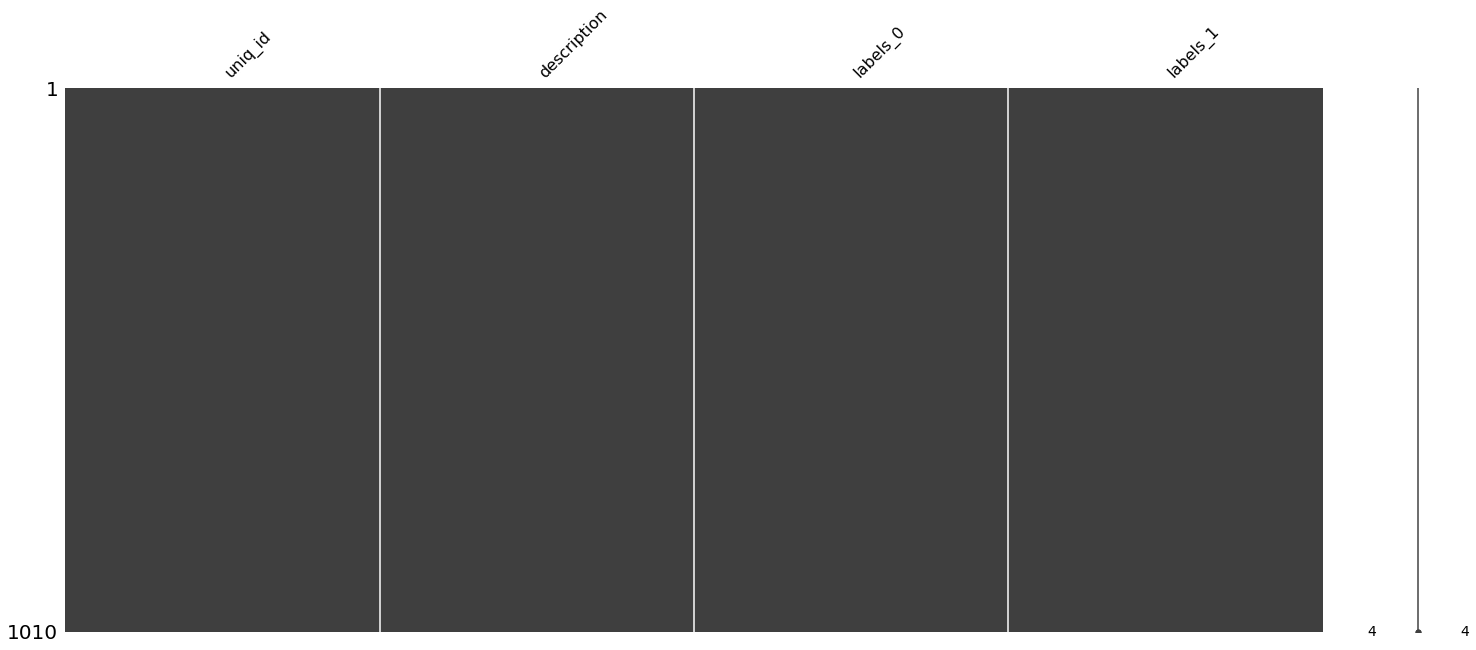

In [25]:
msno.matrix(txt_df)

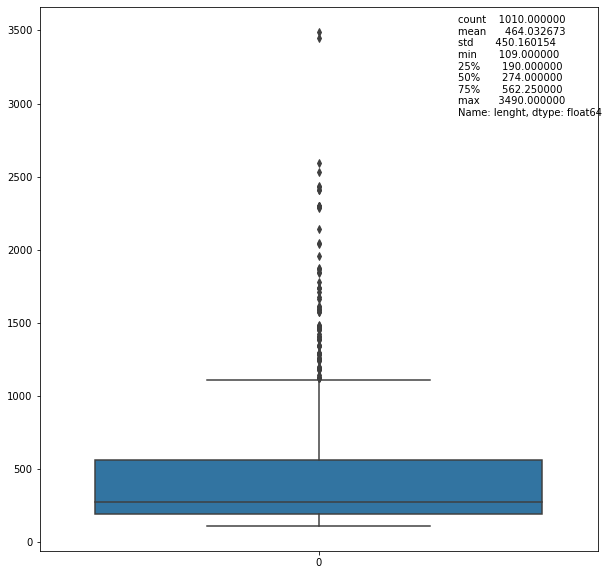

In [26]:
txt_df['lenght'] = txt_df['description'].apply(lambda x: len(x))
txt_df['lenght'].describe()
fig, ax = plt.subplots(figsize=(10, 10))
sns.boxplot(data = txt_df['lenght'],
            ax=ax
           )
ax.text(0.75,
        0.8,
        str(txt_df['lenght'].describe()),
        transform=ax.transAxes
        )
plt.show()

In [27]:
out = []
q1 = txt_df['lenght'].quantile(0.25)
q3 = txt_df['lenght'].quantile(0.75)
interq = q3-q1
out = txt_df.loc[(txt_df['lenght'] < (q1-1.5*interq)) | (txt_df['lenght'] > (q3+1.5*interq))]
print(out.shape[0], out.shape[0]/txt_df.shape[0]*100)
out.sort_values(by='lenght', ascending = False).iloc[1, 1]

84 8.316831683168317


'Key Features of Sunlast 16 inch Laptop Backpack Laptop Backpack with solar panel Comfortable back panel with air-flow design Adjustable sternum strap Large outer elasticated mesh side pocket and a top carry handle Padded and Adjustable shoulder straps Charge your mobile by solar power Mobile power backup option Long life Easy to use,Sunlast 16 inch Laptop Backpack (Yellow) Price: Rs. 2,348 The Sunlast New Laptop Backpack with Solar Panel ensures complete safety to your laptop with its high-quality built and wide range of built-in features. With the inside of this bag featuring a protective padding, you can be rest assured that the laptop inside it will be well cushioned from any accidental damage caused when you bump into any surface. As it is made of nylon, this laptop backpack can withstand abrasions and is long lasting. This Sunlast Backpack comes with a unique solar panel which allows you to charge your mobile phone anywhere anytime. This Sunlast Laptop backpack with solar panel i

In [28]:
# check if all the sentences are english
from spacy_language_detection import LanguageDetector
import en_core_web_sm
from spacy.language import Language
import spacy

def get_lang_detector(nlp, name):
    return LanguageDetector(seed=38)
nlp = en_core_web_sm.load()
Language.factory("language_detector", func=get_lang_detector)
nlp.add_pipe('language_detector', last=True)

In [29]:
def lang_detect(x):
    results = nlp(x)._.language
    return results['language']

txt_df['lang'] = txt_df['description'].apply(lambda x: lang_detect(x))
txt_df['lang'].unique()

array(['en', 'it'], dtype=object)

In [30]:
idx = txt_df.loc[txt_df['lang'] == 'it'].index
txt_df = txt_df.drop(index = idx)

## Preprocessing

In [31]:
import nltk 
import string
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('words')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Nico\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Nico\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\Nico\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Nico\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Nico\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [32]:
words = set(nltk.corpus.words.words())
stopwords = nltk.corpus.stopwords.words('english')
lemmatizer = nltk.stem.WordNetLemmatizer()
cust_word = ['buy',
             'online',
             'flipkat.com',
             'discount',
             'free',
             'shipping',
             'delivery',
             'shipping',
             'cash',
             'product',
             'replacement',
             'guarantee',
             'sale',
             'genuine',
             'content',
             'package',
             
             ]

def prepro(x):
    prepro_list = []
    for sentence in x:
        sent_wo_punc = "".join([i.lower() for i in sentence if i not in string.punctuation])
        sent_wo_num = ''.join([i for i in sent_wo_punc if not i.isdigit()])
        sent_token = nltk.tokenize.word_tokenize(sent_wo_num)
        sent_token_wo_punc = [i for i in sent_token if i not in string.punctuation]
        token_wo_stop = [i for i in sent_token_wo_punc if i not in stopwords]
        token_wo_cust = [i for i in token_wo_stop if i not in cust_word]
        lem = (lemmatizer.lemmatize(i) for i in token_wo_cust if i not in string.punctuation)
        clean = ' '.join(i for i in lem if len(str(i)) > 2)
        prepro_list.append(clean)
    return prepro_list

In [33]:
sentence = txt_df['description'].sample()

In [34]:

sentence = txt_df['description'].sample()
sent_wo_punc = "".join([i.lower() for i in sentence if i not in string.punctuation])
sent_wo_num = ''.join([i for i in sent_wo_punc if not i.isdigit()])
sent_token = nltk.tokenize.word_tokenize(sent_wo_num)
sent_token_wo_punc = [i for i in sent_token if i not in string.punctuation]
token_wo_stop = [i for i in sent_token_wo_punc if i not in stopwords]
token_wo_cust = [i for i in token_wo_stop if i not in cust_word]
lem = (lemmatizer.lemmatize(i) for i in token_wo_cust if i not in string.punctuation)
clean = ' '.join(i for i in lem if len(str(i)) > 2)
clean

'flipkart.com yardley red rose lace combo set flipkart.com product day'

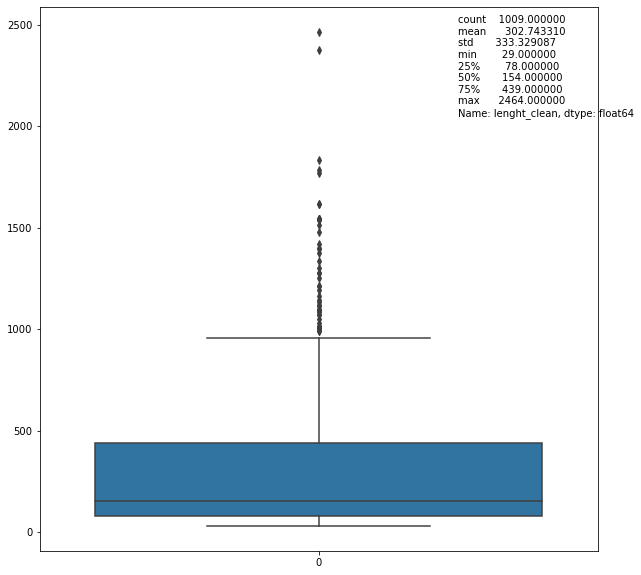

In [35]:
txt_df['description_clean'] = prepro(txt_df['description'])
txt_df['lenght_clean'] = txt_df['description_clean'].apply(lambda x: len(x))
fig, ax = plt.subplots(figsize=(10, 10))
sns.boxplot(data = txt_df['lenght_clean'],
            ax=ax
           )
ax.text(0.75,
        0.8,
        str(txt_df['lenght_clean'].describe()),
        transform=ax.transAxes
        )
plt.show()

In [36]:
idx = txt_df.sample().index
txt_df = txt_df.drop(index = idx)

## Bag of Words

In [37]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words='english')
bag_of_words = vectorizer.fit_transform(txt_df['description_clean'].tolist())

In [38]:
from sklearn import cluster, metrics
clus = cluster.KMeans(n_clusters = label_0_unique, random_state = 38)
clus1 = cluster.KMeans(n_clusters = label_1_unique, random_state = 38)
def ari_score(inputs):
    clus.fit(inputs)
    clus1.fit(inputs)
    ari = metrics.adjusted_rand_score(np.array(txt_df['labels_0']),
                                                 np.array(clus.labels_)
                                                 )
    ari1 = metrics.adjusted_rand_score(np.array(txt_df['labels_1']),
                                                 np.array(clus1.labels_)
                                                 )
    print('The ari scores are {} for categorie 0 and {} for categorie 1.'.format(ari, ari1))


In [39]:
ari_score(bag_of_words)

The ari scores are 0.11785513983540913 for categorie 0 and 0.11361894048779435 for categorie 1.


## Tf-Idf

In [25]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf_vect = TfidfVectorizer(stop_words='english')
tf_idf_matrix = tf_idf_vect.fit_transform(txt_df['description_clean'].tolist())
clus.fit(tf_idf_matrix)
clus1.fit(tf_idf_matrix)
ari = metrics.adjusted_rand_score(np.array(txt_df['labels_0']),
                                                 np.array(clus.labels_)
                                                 )
ari1 = metrics.adjusted_rand_score(np.array(txt_df['labels_1']),
                                                 np.array(clus1.labels_)
                                                 )
print('The ari scores are {} for categorie 0 and {} for categorie 1.'.format(ari, ari1))

The ari scores are 0.2552906488226122 for categorie 0 and 0.3653036370784057 for categorie 1.


### n-gram

In [26]:
# Bag of words
for i in range(1, 6):
    vectorizer = CountVectorizer(stop_words='english', ngram_range=(i, i))
    bag_of_words = vectorizer.fit_transform(txt_df['description_clean'].tolist())
    clus.fit(bag_of_words)
    clus1.fit(bag_of_words)
    ari = metrics.adjusted_rand_score(np.array(txt_df['labels_0']),
                                                 np.array(clus.labels_)
                                                 )
    ari1 = metrics.adjusted_rand_score(np.array(txt_df['labels_1']),
                                                 np.array(clus1.labels_)
                                                 )
    print('The ari scores for the {}-gram are {} for categorie 0 and {} for categorie 1.'.format(i, ari, ari1))


The ari scores for the 1-gram are 0.18780296667280658 for categorie 0 and 0.1597713663696494 for categorie 1.
The ari scores for the 2-gram are 0.002007396872167052 for categorie 0 and 0.1594898915081461 for categorie 1.
The ari scores for the 3-gram are 0.004795497498175688 for categorie 0 and 0.09862007267738222 for categorie 1.
The ari scores for the 4-gram are 0.004279968646970124 for categorie 0 and 0.029699517512352436 for categorie 1.
The ari scores for the 5-gram are 0.0035664862458679603 for categorie 0 and 0.010518012630339697 for categorie 1.


In [27]:
# tf-idf
for i in range(1,6):
    tf_idf_vect = TfidfVectorizer(stop_words='english', ngram_range=(i, i))
    tf_idf_matrix = tf_idf_vect.fit_transform(txt_df['description_clean'].tolist())
    clus.fit(tf_idf_matrix)
    clus1.fit(tf_idf_matrix)
    ari = metrics.adjusted_rand_score(np.array(txt_df['labels_0']),
                                                 np.array(clus.labels_)
                                                 )
    ari1 = metrics.adjusted_rand_score(np.array(txt_df['labels_1']),
                                                 np.array(clus1.labels_)
                                                 )
    print('The ari scores for the {}-gram are {} for categorie 0 and {} for categorie 1.'.format(i, ari, ari1))

The ari scores for the 1-gram are 0.2552906488226122 for categorie 0 and 0.3653036370784057 for categorie 1.
The ari scores for the 2-gram are 0.19999371503272612 for categorie 0 and 0.2780650157080974 for categorie 1.
The ari scores for the 3-gram are 0.18824325883836945 for categorie 0 and 0.19338314404661922 for categorie 1.
The ari scores for the 4-gram are 0.11528589917724935 for categorie 0 and 0.12457914945411439 for categorie 1.
The ari scores for the 5-gram are 0.048392074322908096 for categorie 0 and 0.09588898386963923 for categorie 1.


In [28]:
txt_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1008 entries, 0 to 1049
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   uniq_id            1008 non-null   object
 1   description        1008 non-null   object
 2   labels_0           1008 non-null   int32 
 3   labels_1           1008 non-null   int32 
 4   lenght             1008 non-null   int64 
 5   lang               1008 non-null   object
 6   description_clean  1008 non-null   object
 7   lenght_clean       1008 non-null   int64 
dtypes: int32(2), int64(2), object(4)
memory usage: 63.0+ KB


## Word2Vec

In [29]:
txt_df['description_token'] = txt_df['description_clean'].apply(lambda x: nltk.tokenize.word_tokenize(x))

In [30]:
from gensim.models import Word2Vec
model = Word2Vec(vector_size = 300)
model.build_vocab(txt_df['description_token'].tolist())
model.train(txt_df['description_token'].tolist(), total_examples=model.corpus_count, epochs=35)

(1104991, 1536850)

In [31]:
model.corpus_count

1008

In [32]:
vector = model.wv

In [33]:
vector.most_similar("natural")

[('vibrantly', 0.7979848980903625),
 ('conditioner', 0.7756807208061218),
 ('pencil', 0.7636284828186035),
 ('lip', 0.756722629070282),
 ('smooth', 0.7490120530128479),
 ('oudh', 0.7420098781585693),
 ('deep', 0.7104801535606384),
 ('shampoo', 0.7081885933876038),
 ('arabic', 0.700836181640625),
 ('liner', 0.700491726398468)]

In [34]:
vector.most_similar('computer')

[('keyboard', 0.9451080560684204),
 ('vacuum', 0.9339250922203064),
 ('connect', 0.9111831784248352),
 ('device', 0.9106087684631348),
 ('cleaner', 0.9062736630439758),
 ('desktop', 0.8817386627197266),
 ('requirement', 0.8751876354217529),
 ('otg', 0.8735296726226807),
 ('hdmi', 0.8607248067855835),
 ('air', 0.8599439859390259)]

In [35]:
def get_mean(vectors, document):
    # check if each token is in the vocab (min =5)
    doc = [i for i in document if i in vectors.index_to_key]
    mean = np.mean(vectors[doc], axis = 0)
    return mean

In [36]:
txt_df['embeded_doc'] = txt_df['description_token'].apply(lambda x: get_mean(vector, x))

In [37]:
embeded_doc = pd.DataFrame(txt_df['embeded_doc'].tolist())
clus.fit(embeded_doc)
clus1.fit(embeded_doc)
ari = metrics.adjusted_rand_score(np.array(txt_df['labels_0']),
                                                 np.array(clus.labels_)
                                                 )
ari1 = metrics.adjusted_rand_score(np.array(txt_df['labels_1']),
                                                 np.array(clus1.labels_)
                                                 )
print('The ari scores are {} for categorie 0 and {} for categorie 1.'.format(ari, ari1))

The ari scores are 0.378483931536869 for categorie 0 and 0.47750872160401825 for categorie 1.


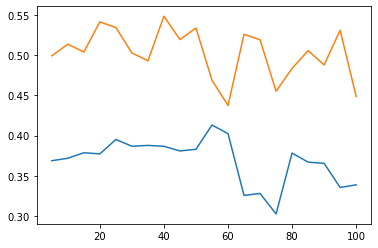

In [38]:
ari_l = []
ari_l1 = []
for i in np.arange(5,105,5):
    model.train(txt_df['description_token'].tolist(), total_examples=model.corpus_count, epochs=i)
    vector = model.wv
    temp = txt_df['description_token'].apply(lambda x: get_mean(vector, x))
    temp = pd.DataFrame(temp.tolist())
    clus.fit(temp)
    clus1.fit(temp)
    ari_l.append(metrics.adjusted_rand_score(np.array(txt_df['labels_0']),
                                                 np.array(clus.labels_)
                                                 ))
    ari_l1.append(metrics.adjusted_rand_score(np.array(txt_df['labels_1']),
                                                 np.array(clus1.labels_)
                                                 ))
plt.plot(np.arange(5,105,5),ari_l)
plt.plot(np.arange(5,105,5),ari_l1)
plt.show()    

### n-gram

In [39]:
from gensim.models import phrases

In [40]:
bigrams = phrases.Phrases(txt_df['description_token'], threshold=10.0)
model2 = Word2Vec(bigrams[txt_df['description_token']], vector_size = 300)
model2.train(txt_df['description_token'], total_examples=model2.corpus_count, epochs=model2.epochs)

(155271, 219550)

In [41]:
vector2 = model2.wv
vector2.most_similar('computer')

[('air', 0.9993345737457275),
 ('keyboard', 0.9993333220481873),
 ('mobile', 0.9991750717163086),
 ('vacuum', 0.9991583824157715),
 ('vgncrer', 0.9991440773010254),
 ('device', 0.9991117119789124),
 ('portable', 0.9990770816802979),
 ('otg', 0.9989989995956421),
 ('plug', 0.99897301197052),
 ('may', 0.9989147186279297)]

In [42]:
temp = txt_df['description_token'].apply(lambda x: get_mean(vector2, x))
temp = pd.DataFrame(temp.tolist())
clus.fit(temp)
clus1.fit(temp)
ari = metrics.adjusted_rand_score(np.array(txt_df['labels_0']),
                                                 np.array(clus.labels_)
                                                 )
ari1 = metrics.adjusted_rand_score(np.array(txt_df['labels_1']),
                                                 np.array(clus1.labels_)
                                                 )
print('The ari scores are {} for categorie 0 and {} for categorie 1.'.format(ari, ari1))

The ari scores are 0.2556696417960678 for categorie 0 and 0.22856296689260697 for categorie 1.


In [43]:
# test with a classifier 
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV

xgb_class = xgb.XGBClassifier()
class_df = pd.DataFrame({'mean_wv': txt_df['description_token'].apply(lambda x: get_mean(vector2, x))})
class_df = pd.DataFrame(class_df['mean_wv'].tolist())
xtrain, xtest, ytrain, ytest = train_test_split(class_df, txt_df['labels_0'], test_size = 0.8, stratify = txt_df['labels_0'])

xgb_class.fit(xtrain, ytrain)
xgb_class.score(xtest, ytest)

0.7410161090458488

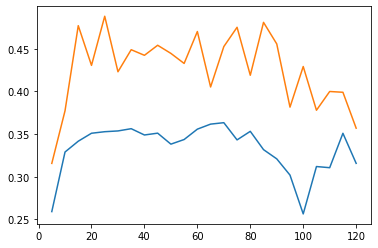

In [44]:
ari_l = []
ari_l1 = []
for i in np.arange(5,125,5):
    model2.train(txt_df['description_token'].tolist(), total_examples=model2.corpus_count, epochs=i)
    vector2 = model2.wv
    temp = txt_df['description_token'].apply(lambda x: get_mean(vector2, x))
    temp = pd.DataFrame(temp.tolist())
    clus.fit(temp)
    clus1.fit(temp)
    ari_l.append(metrics.adjusted_rand_score(np.array(txt_df['labels_0']),
                                                 np.array(clus.labels_)
                                                 ))
    ari_l1.append(metrics.adjusted_rand_score(np.array(txt_df['labels_1']),
                                                 np.array(clus1.labels_)
                                                 ))
plt.plot(np.arange(5,125,5),ari_l)
plt.plot(np.arange(5,125,5),ari_l1)
plt.show()   

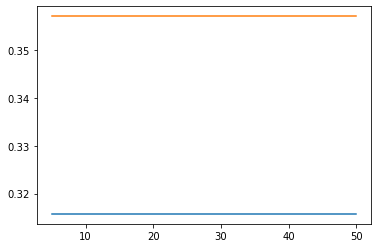

In [45]:
# test with skipgram instead of cbow
model3 = Word2Vec(vector_size = 300,sg =1)
model3.build_vocab(txt_df['description_token'].tolist())
ari_l = []
ari_l1 = []
for i in np.arange(5,55,5):
    model3.train(txt_df['description_token'].tolist(), total_examples=model2.corpus_count, epochs=i)
    vector3 = model2.wv
    temp = txt_df['description_token'].apply(lambda x: get_mean(vector3, x))
    temp = pd.DataFrame(temp.tolist())
    clus.fit(temp)
    clus1.fit(temp)
    ari_l.append(metrics.adjusted_rand_score(np.array(txt_df['labels_0']),
                                                 np.array(clus.labels_)
                                                 ))
    ari_l1.append(metrics.adjusted_rand_score(np.array(txt_df['labels_1']),
                                                 np.array(clus1.labels_)
                                                 ))
plt.plot(np.arange(5,55,5),ari_l)
plt.plot(np.arange(5,55,5),ari_l1)
plt.show()

In [46]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

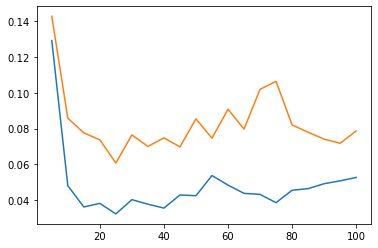

In [47]:

tagged_txt = [TaggedDocument(d, [i]) for i, d in enumerate(txt_df['description_token'].tolist())]
ari_l = []
ari_l1 = []
for i in np.arange(5,105,5):
    model4 = Doc2Vec(tagged_txt, epochs = i, vector_size = 300)
    temp = txt_df['description_token'].apply(lambda x: model4.infer_vector(x))
    temp = pd.DataFrame(temp.tolist())
    clus.fit(temp)
    clus1.fit(temp)
    ari_l.append(metrics.adjusted_rand_score(np.array(txt_df['labels_0']),
                                                 np.array(clus.labels_)
                                                 ))
    ari_l1.append(metrics.adjusted_rand_score(np.array(txt_df['labels_1']),
                                                 np.array(clus1.labels_)
                                                 ))
plt.plot(np.arange(5,105,5),ari_l)
plt.plot(np.arange(5,105,5),ari_l1)
plt.show()   

## BERT

In [48]:
import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text

In [49]:
bert_preprocess = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
bert_encoder = hub.KerasLayer("https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4")

In [50]:
text_input = tf.keras.layers.Input(shape=(), dtype=tf.string, name='text')
preprocessed_text = bert_preprocess(text_input)
outputs = bert_encoder(preprocessed_text)

In [51]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import metrics as kmetrics
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
import transformers as trans 

In [52]:
# Hugging Face
def bert_inp_fct(sentences, bert_tokenizer, max_length) :
    input_ids=[]
    token_type_ids = []
    attention_mask=[]
    bert_inp_tot = []

    for sent in sentences:
        bert_inp = bert_tokenizer.encode_plus(sent,
                                              add_special_tokens = True,
                                              max_length = max_length,
                                              padding='max_length',
                                              return_attention_mask = True, 
                                              return_token_type_ids=True,
                                              truncation=True,
                                              return_tensors="tf")
    
        input_ids.append(bert_inp['input_ids'][0])
        token_type_ids.append(bert_inp['token_type_ids'][0])
        attention_mask.append(bert_inp['attention_mask'][0])
        bert_inp_tot.append((bert_inp['input_ids'][0], 
                             bert_inp['token_type_ids'][0], 
                             bert_inp['attention_mask'][0]))

    input_ids = np.asarray(input_ids)
    token_type_ids = np.asarray(token_type_ids)
    attention_mask = np.array(attention_mask)
    
    return input_ids, token_type_ids, attention_mask, bert_inp_tot
    

# Fonction de création des features
def feature_BERT_fct(model, model_type, sentences, max_length, b_size, mode='HF') :
    batch_size = b_size
    batch_size_pred = b_size
    bert_tokenizer = trans.AutoTokenizer.from_pretrained(model_type)

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        input_ids, token_type_ids, attention_mask, bert_inp_tot = bert_inp_fct(sentences[idx:idx+batch_size], 
                                                                      bert_tokenizer, max_length)
        
        if mode=='HF' :    # Bert HuggingFace
            outputs = model.predict([input_ids, attention_mask, token_type_ids], batch_size=batch_size_pred)
            last_hidden_states = outputs.last_hidden_state

        if mode=='TFhub' : # Bert Tensorflow Hub
            text_preprocessed = {"input_word_ids" : input_ids, 
                                 "input_mask" : attention_mask, 
                                 "input_type_ids" : token_type_ids}
            outputs = model(text_preprocessed)
            last_hidden_states = outputs['sequence_output']
        if mode=='Fine_Tune':
            outputs = model.predict([input_ids, attention_mask, token_type_ids], batch_size=batch_size_pred)
            last_hidden_states = outputs.hidden_states[-1]
             
        if step ==0 :
            last_hidden_states_tot = last_hidden_states
            last_hidden_states_tot_0 = last_hidden_states
        else :
            last_hidden_states_tot = np.concatenate((last_hidden_states_tot,last_hidden_states))
    
    features_bert = np.array(last_hidden_states_tot).mean(axis=1)
    
     
    return features_bert, last_hidden_states_tot

In [53]:
len(txt_df['description_clean'].tolist())

1008

In [54]:
max_length = 68
batch_size = 8
model_type = 'bert-base-uncased'
model = trans.TFAutoModel.from_pretrained(model_type)
sentences = txt_df['description_clean'].tolist()

Some layers from the model checkpoint at bert-base-uncased were not used when initializing TFBertModel: ['nsp___cls', 'mlm___cls']
- This IS expected if you are initializing TFBertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
All the layers of TFBertModel were initialized from the model checkpoint at bert-base-uncased.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFBertModel for predictions without further training.


In [55]:
# Création des features

features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, sentences, 
                                                         max_length, batch_size, mode='HF')

1/1 [==============================] - 0s 428ms/step


In [56]:
features_bert.shape

(1008, 768)

In [57]:
clus.fit(features_bert)
clus1.fit(features_bert)
ari = metrics.adjusted_rand_score(np.array(txt_df['labels_0']),
                                                 np.array(clus.labels_)
                                                 )
ari1 = metrics.adjusted_rand_score(np.array(txt_df['labels_1']),
                                                 np.array(clus1.labels_)
                                                 )
print('The ari scores are {} for categorie 0 and {} for categorie 1.'.format(ari, ari1))

The ari scores are 0.340387754338512 for categorie 0 and 0.3902844332409672 for categorie 1.


In [58]:
model_url = 'https://tfhub.dev/tensorflow/bert_en_uncased_L-12_H-768_A-12/4'
bert_layer = hub.KerasLayer(model_url, trainable=True)

In [59]:
max_length = 64
batch_size = 8
model_type = 'bert-base-uncased'
model = bert_layer

features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, sentences, 
                                                         max_length, batch_size, mode='TFhub')

In [60]:
clus.fit(features_bert)
clus1.fit(features_bert)
ari = metrics.adjusted_rand_score(np.array(txt_df['labels_0']),
                                                 np.array(clus.labels_)
                                                 )
ari1 = metrics.adjusted_rand_score(np.array(txt_df['labels_1']),
                                                 np.array(clus1.labels_)
                                                 )
print('The ari scores are {} for categorie 0 and {} for categorie 1.'.format(ari, ari1))

The ari scores are 0.36064435240966813 for categorie 0 and 0.3777706747361607 for categorie 1.


### Fine-Tune

In [61]:
# let's try to fine-tune this
from tensorflow.keras.optimizers import Adam
#tokenize
bert_tokenizer = trans.AutoTokenizer.from_pretrained('bert-base-uncased')
max_length = 34
doc_token = bert_tokenizer(sentences,max_length=max_length, padding = 'max_length', truncation = True, return_tensors="tf", return_attention_mask = False, return_token_type_ids=False)

In [62]:
temp = pd.DataFrame(sentences)
def tokenize_dataset(data):
    # Keys of the returned dictionary will be added to the dataset as columns
    return bert_tokenizer(data[0])


temp = temp.apply(tokenize_dataset)

In [63]:
model_ft = trans.TFAutoModelForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=37,output_hidden_states=True)
model_ft.compile(optimizer=Adam(3e-5))


All model checkpoint layers were used when initializing TFBertForSequenceClassification.

Some layers of TFBertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
No loss specified in compile() - the model's internal loss computation will be used as the loss. Don't panic - this is a common way to train TensorFlow models in Transformers! To disable this behaviour please pass a loss argument, or explicitly pass `loss=None` if you do not want your model to compute a loss.


In [64]:
labels = np.array(txt_df['labels_1'])

model_ft.fit(doc_token['input_ids'], labels)

32/32 [==============================] - 112s 3s/step - loss: 3.2136


In [65]:
sentences[0]

'key feature elegance polyester multicolor abstract eyelet door curtain floral curtainelegance polyester multicolor abstract eyelet door curtain height pack price curtain enhances look interiorsthis curtain made high quality polyester fabricit feature eyelet style stitch metal ringit make room environment romantic lovingthis curtain ant wrinkle anti shrinkage elegant apparancegive home bright modernistic appeal design surreal attention sure steal heart contemporary eyelet valance curtain slide smoothly draw apart first thing morning welcome bright sun ray want wish good morning whole world draw close evening create special moment joyous beauty given soothing print bring home elegant curtain softly filter light room get right amount sunlightspecifications elegance polyester multicolor abstract eyelet door curtain height pack general brand elegance designed door type eyelet model name abstract polyester door curtain set model duster color multicolor dimension length box number content sa

In [66]:
bert_tokenizer = trans.AutoTokenizer.from_pretrained("bert-base-uncased")
max_length = 50

input_ids, token_type_ids, attention_mask, bert_inp_tot = bert_inp_fct(sentences[0], 
                                                                      bert_tokenizer, max_length)

outputs = model_ft.predict([input_ids, attention_mask, token_type_ids], batch_size=8)


132/132 [==============================] - 51s 350ms/step


In [67]:
outputs.hidden_states[-1][-1].shape

(50, 768)

In [68]:
tf.test.is_built_with_gpu_support()

True

In [69]:
len(sentences[0])

1050

In [70]:
max_length = 64
batch_size = 8
model_type = 'bert-base-uncased'
model = model_ft

features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, sentences, 
                                                         max_length, batch_size, mode='Fine_Tune')

1/1 [==============================] - 0s 482ms/step


In [71]:
clus.fit(features_bert)
clus1.fit(features_bert)
ari = metrics.adjusted_rand_score(np.array(txt_df['labels_0']),
                                                 np.array(clus.labels_)
                                                 )
ari1 = metrics.adjusted_rand_score(np.array(txt_df['labels_1']),
                                                 np.array(clus1.labels_)
                                                 )
print('The ari scores are {} for categorie 0 and {} for categorie 1.'.format(ari, ari1))

The ari scores are 0.3834895322830199 for categorie 0 and 0.5823121215605764 for categorie 1.


In [74]:
features_bert_df = pd.DataFrame(features_bert)
features_bert_df.to_csv('features_bert_df.csv', index = False)

## USE

In [85]:
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [86]:
def feature_USE_fct(sentences, b_size) :
    batch_size = b_size

    for step in range(len(sentences)//batch_size) :
        idx = step*batch_size
        feat = embed(sentences[idx:idx+batch_size])

        if step ==0 :
            features = feat
        else :
            features = np.concatenate((features,feat))

    return features

In [87]:
batch_size = 8
features_USE = feature_USE_fct(sentences, batch_size)

UnknownError: Graph execution error:

JIT compilation failed.
	 [[{{node EncoderDNN/EmbeddingLookup/EmbeddingLookupUnique/embedding_lookup/mod}}]] [Op:__inference_restored_function_body_337312]

In [74]:
clus.fit(features_USE)
clus1.fit(features_USE)
ari = metrics.adjusted_rand_score(np.array(txt_df['labels_0']),
                                                 np.array(clus.labels_)
                                                 )
ari1 = metrics.adjusted_rand_score(np.array(txt_df['labels_1']),
                                                 np.array(clus1.labels_)
                                                 )
print('The ari scores are {} for categorie 0 and {} for categorie 1.'.format(ari, ari1))

The ari scores are 0.39333464433483084 for categorie 0 and 0.39638225160331997 for categorie 1.


## LDA

In [92]:
from sklearn.decomposition import LatentDirichletAllocation
n_topics = label_1_unique

# Créer le modèle LDA
lda = LatentDirichletAllocation(
        n_components=n_topics, 
        max_iter=5,  
        learning_offset=50.,
        random_state=0)

# Fitter sur les données
lda.fit(bag_of_words)

LatentDirichletAllocation(learning_offset=50.0, max_iter=5, n_components=37,
                          random_state=0)

In [93]:
vectorizer.get_feature_names_out()

array(['aaa battery battery life hour',
       'aapno rajasthan lovely jewellery vanity',
       'aapno rajasthan marvel marble gold', ...,
       'zyxel data card flipkartcom product',
       'zyxel pla flipkartcom product day',
       'zyxel vmgba vdsl wireless vdsl'], dtype=object)

In [94]:
def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print("Topic {}:".format(topic_idx))
        print(" ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))

no_top_words = 5
display_topics(lda, vectorizer.get_feature_names_out(), no_top_words)


Topic 0:
red bull laptop skin mouse graphic dancer laptop skin mouse dancer laptop skin mouse pad bull laptop skin mouse pad max cartoon laptop skin mouse
Topic 1:
skin mouse pad combo set laptop skin mouse pad combo mouse pad combo set multicolor box number content sale pack warranty summary warranty box number
Topic 2:
size light weight convenient use compact size light weight convenient bedsheet double bedsheet pillow cover double bedsheet double bedsheet pillow double bedsheet pillow cover multicolor
Topic 3:
otg enabled android smart phone smallest mobile powered otg enabled powered otg enabled android smart mobile powered otg enabled android jrb smallest mobile powered otg
Topic 4:
general type mug mug capacity mug general type mug mug ceramic mug general type mug flipkartcom great discount product day india flipkartcom great discount product
Topic 5:
decal small self adhesive sticker glass mossiac table lamp multi mossiac table lamp multi color flipkartcom lowest price product d

# Image

In [10]:
from PIL import ImageOps
from PIL import Image
from PIL import ImageFilter

In [11]:
img_df = df.iloc[:, [0, 8, 17, 18]].reset_index(drop=True)
img_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   uniq_id   1010 non-null   object
 1   image     1010 non-null   object
 2   labels_0  1010 non-null   int32 
 3   labels_1  1010 non-null   int32 
dtypes: int32(2), object(2)
memory usage: 23.8+ KB


In [12]:
img_df.head()

,uniq_id,image,labels_0,labels_1
0,55b85ea15a1536d46b7190ad6fff8ce7,55b85ea15a1536d46b7190ad6fff8ce7.jpg,4,14
1,7b72c92c2f6c40268628ec5f14c6d590,7b72c92c2f6c40268628ec5f14c6d590.jpg,0,1
2,64d5d4a258243731dc7bbb1eef49ad74,64d5d4a258243731dc7bbb1eef49ad74.jpg,0,1
3,d4684dcdc759dd9cdf41504698d737d8,d4684dcdc759dd9cdf41504698d737d8.jpg,4,7
4,6325b6870c54cd47be6ebfbffa620ec7,6325b6870c54cd47be6ebfbffa620ec7.jpg,4,7


In [13]:
path = 'E:\\Data_Science\\OpenClassRoom\\Projet 6\\Flipkart\\Images\\'
img_lib = {'image':[],
        'img_array' : [],
        'img_mode' : [],
        'img_size' : [],
        'img_width' : [],
        'img_height' : []}

for i in img_df['image']:
    img = Image.open(path+i)
    img_lib['image'].append(i)
    img_lib['img_array'].append(np.array(img))
    img_lib['img_mode'].append(img.mode)
    img_lib['img_width'].append(img.size[0])
    img_lib['img_height'].append(img.size[1])
    img_lib['img_size'].append(img.size)
img_lib = pd.DataFrame(img_lib)

    

E:\Data_Science\Anaconda\envs\tf_gpu\lib\site-packages\PIL\Image.py:3167: DecompressionBombWarning: Image size (93680328 pixels) exceeds limit of 89478485 pixels, could be decompression bomb DOS attack.
  warnings.warn(


In [14]:
img_lib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   image       1010 non-null   object
 1   img_array   1010 non-null   object
 2   img_mode    1010 non-null   object
 3   img_size    1010 non-null   object
 4   img_width   1010 non-null   int64 
 5   img_height  1010 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 47.5+ KB


In [15]:
img_lib.head(1)

,image,img_array,img_mode,img_size,img_width,img_height
0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,"[[[192, 184, 173], [192, 184, 173], [193, 185,...",RGB,"(3600, 3600)",3600,3600


In [16]:
img_df = img_df.join(img_lib, rsuffix = 'image')

In [17]:
img_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   uniq_id     1010 non-null   object
 1   image       1010 non-null   object
 2   labels_0    1010 non-null   int32 
 3   labels_1    1010 non-null   int32 
 4   imageimage  1010 non-null   object
 5   img_array   1010 non-null   object
 6   img_mode    1010 non-null   object
 7   img_size    1010 non-null   object
 8   img_width   1010 non-null   int64 
 9   img_height  1010 non-null   int64 
dtypes: int32(2), int64(2), object(6)
memory usage: 71.1+ KB


In [18]:
img_df.sample(1)

,uniq_id,image,labels_0,labels_1,imageimage,img_array,img_mode,img_size,img_width,img_height
180,ce2f67c3365846170cb709784d87e45b,ce2f67c3365846170cb709784d87e45b.jpg,5,9,ce2f67c3365846170cb709784d87e45b.jpg,"[[[254, 250, 251], [254, 250, 251], [254, 250,...",RGB,"(1100, 1048)",1100,1048


In [19]:
print(img_df['img_mode'].unique())
print(len(img_df['img_size'].unique()))

['RGB']
853


<AxesSubplot: >

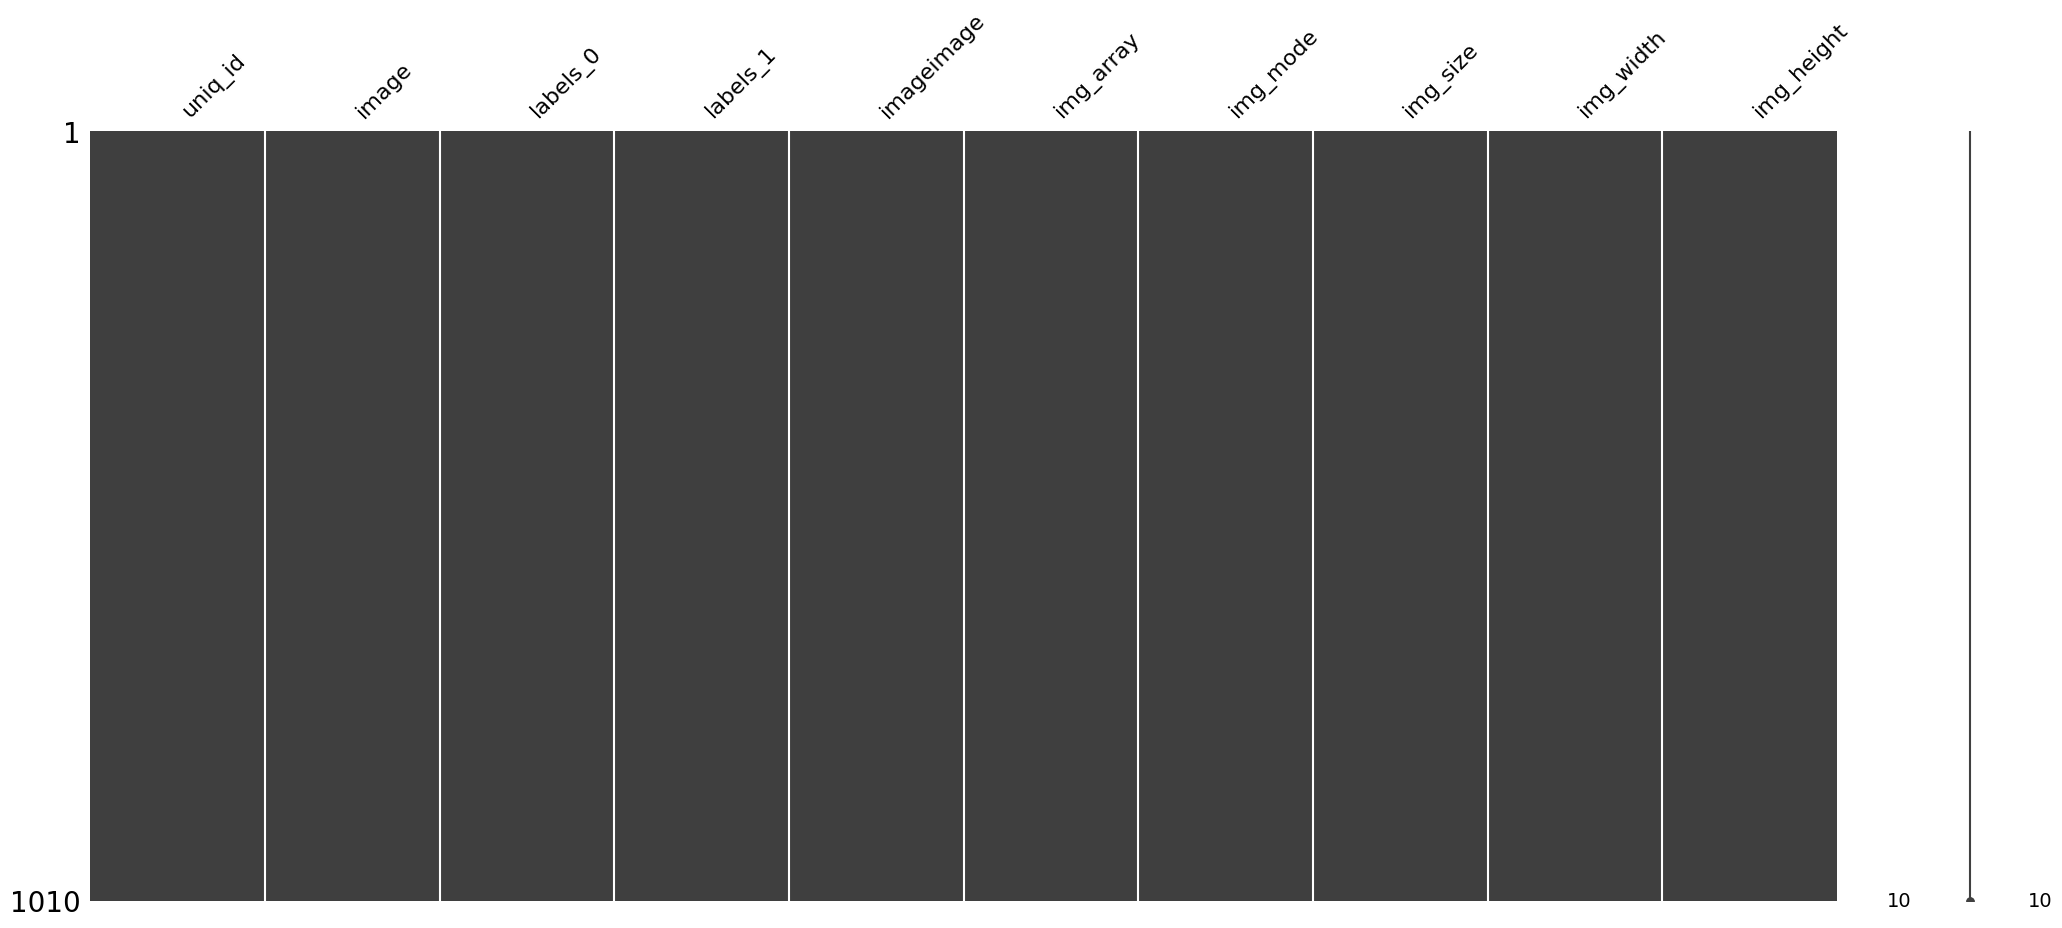

In [20]:
msno.matrix(img_df)

In [21]:
# need to resize the images

In [22]:
def img_prepro(x, size = (200,200)):
    img = Image.fromarray(x)
    img = img.resize(size)
    img = ImageOps.autocontrast(img)
    img = ImageOps.equalize(img)
    img = img.filter(ImageFilter.MedianFilter(3))
    x = np.array(img)
    return x




In [ ]:
img_df['new_array'] = img_df['img_array'].apply(lambda x: img_prepro(x))

In [118]:
def convert(x, mode = 'L'):
    img = Image.fromarray(x)
    img = img.convert(mode=mode)
    x = np.array(img)
    return x



In [ ]:
img_df['L_array'] = img_df['new_array'].apply(lambda x: convert(x))

In [119]:
img_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   uniq_id     1010 non-null   object
 1   image       1010 non-null   object
 2   labels_0    1010 non-null   int32 
 3   labels_1    1010 non-null   int32 
 4   imageimage  1010 non-null   object
 5   img_array   1010 non-null   object
 6   img_mode    1010 non-null   object
 7   img_size    1010 non-null   object
 8   img_width   1010 non-null   int64 
 9   img_height  1010 non-null   int64 
 10  new_array   1010 non-null   object
 11  L_array     1010 non-null   object
dtypes: int32(2), int64(2), object(8)
memory usage: 86.9+ KB


In [120]:
img_df['L_norm'] = img_df['L_array'].apply(lambda x: x/255)

In [121]:
img_df['L_flatten'] = img_df['L_norm'].apply(lambda x: x.flatten())

In [122]:
label_1_unique

37

In [138]:
label_1_unique

37

In [13]:
from sklearn import cluster, metrics
clus = cluster.KMeans(n_clusters = label_0_unique, random_state = 38)
clus1 = cluster.KMeans(n_clusters = label_1_unique, random_state = 38)
def ari_score(inputs):
    clus.fit(inputs)
    clus1.fit(inputs)
    ari = metrics.adjusted_rand_score(np.array(img_df['labels_0']),
                                                 np.array(clus.labels_)
                                                 )
    ari1 = metrics.adjusted_rand_score(np.array(img_df['labels_1']),
                                                 np.array(clus1.labels_)
                                                 )
    print('The ari scores are {} for categorie 0 and {} for categorie 1.'.format(ari, ari1))
 

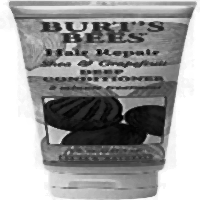

In [124]:
Image.fromarray(img_df.iloc[38, -3])

In [125]:
ari_score(img_df['L_flatten'].tolist())

E:\Data_Science\Anaconda\envs\tf_gpu\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
E:\Data_Science\Anaconda\envs\tf_gpu\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


The ari scores are 0.12350032956345872 for categorie 0 and 0.12767916608204916 for categorie 1.


## SIFT

In [126]:
import cv2 as cv

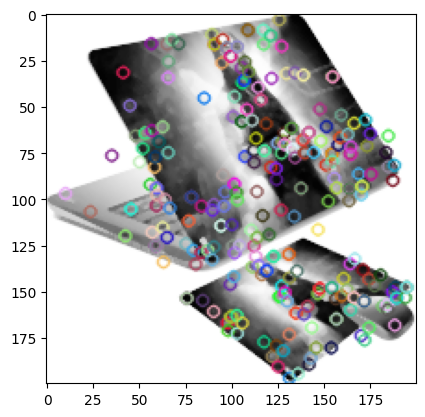

(255, 128)


In [127]:
rand = np.random.randint(1010)
sift = cv.SIFT_create(500)
test = img_df.iloc[rand, -3]
kp, des = sift.detectAndCompute(test, None)
testkp = cv.drawKeypoints(test, kp, test)
plt.imshow(testkp)
plt.show()
print(des.shape)

In [128]:
# create descriptors for each image
def des_img(x, max_feat = 500, detect = 'sift'):
    if detect == 'sift':
        algo = cv.SIFT_create(max_feat)
    elif detect == 'orb':
        algo = cv.ORB_create(max_feat, edgeThreshold = 10, patchSize = 10)
    kp, des = algo.detectAndCompute(x, None)
    return des

sift_df = pd.DataFrame()
sift_df['des'] = img_df['L_array'].apply(lambda x: des_img(x))


In [129]:
#list of descriptors by img
sift_img = np.array(sift_df['des'].tolist(), dtype=object)

#array of all descriptors
sift_img_all = np.concatenate(sift_img, axis=0)
print(sift_img_all.shape)

(302402, 128)


In [130]:
orb_img[315]

NameError: name 'orb_img' is not defined

In [131]:
# clusters the descriptors
from joblib import dump, load
k = 3000
print(k)

try:
    clus_des = load('clus_des.joblib')
except FileNotFoundError:
    clus_des = cluster.KMeans(n_clusters=k, random_state = 38)
    clus_des.fit(sift_img_all)
    dump(clus_des, 'clus_des.joblib')

3000


E:\Data_Science\Anaconda\envs\tf_gpu\lib\site-packages\sklearn\base.py:288: UserWarning: Trying to unpickle estimator KMeans from version 1.0.2 when using version 1.2.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


In [132]:
# build histogrammes for each images
def hist(x, model):
    res = model.predict(x)
    hist = np.zeros(len(model.cluster_centers_))
    nb_des=len(x)
    if nb_des==0 : print("Error no descriptors  : ", x.index)
    for i in res:
        hist[i] += 1.0/nb_des
    return hist



In [133]:
sift_df['hist'] = sift_df['des'].apply(lambda x: hist(x, model=clus_des))

In [134]:
ari_score(sift_df['hist'].tolist())

E:\Data_Science\Anaconda\envs\tf_gpu\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
E:\Data_Science\Anaconda\envs\tf_gpu\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


The ari scores are 0.006940871762848374 for categorie 0 and 0.014671117294801216 for categorie 1.


In [135]:
sift_df.iloc[85, -1]

array([0., 0., 0., ..., 0., 0., 0.])

In [136]:
img_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   uniq_id     1010 non-null   object
 1   image       1010 non-null   object
 2   labels_0    1010 non-null   int32 
 3   labels_1    1010 non-null   int32 
 4   imageimage  1010 non-null   object
 5   img_array   1010 non-null   object
 6   img_mode    1010 non-null   object
 7   img_size    1010 non-null   object
 8   img_width   1010 non-null   int64 
 9   img_height  1010 non-null   int64 
 10  new_array   1010 non-null   object
 11  L_array     1010 non-null   object
 12  L_norm      1010 non-null   object
 13  L_flatten   1010 non-null   object
dtypes: int32(2), int64(2), object(10)
memory usage: 102.7+ KB


In [137]:
sift_df = sift_df.join(img_df.iloc[:,2:4])

In [138]:
sift_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   des       1010 non-null   object
 1   hist      1010 non-null   object
 2   labels_0  1010 non-null   int32 
 3   labels_1  1010 non-null   int32 
dtypes: int32(2), object(2)
memory usage: 23.8+ KB


In [139]:
# test with a classifier 
import xgboost as xgb
from sklearn.model_selection import train_test_split, GridSearchCV

xgb_class = xgb.XGBClassifier(n_estimators = 2000)
temp = pd.DataFrame(sift_df['hist'].tolist())
xtrain, xtest, ytrain0, ytest0 = train_test_split(temp, sift_df['labels_0'], test_size = 0.8, stratify = sift_df['labels_0'], random_state=38)

xgb_class.fit(xtrain, ytrain0)
xgb_class.score(xtest, ytest0)

0.3180693069306931

In [140]:
xtrain, xtest, ytrain1, ytest1 = train_test_split(temp, sift_df['labels_1'], test_size = 0.8, stratify = sift_df['labels_1'], random_state=38)

xgb_class.fit(xtrain, ytrain0)
xgb_class.score(xtest, ytest0)

0.1707920792079208

### ORB

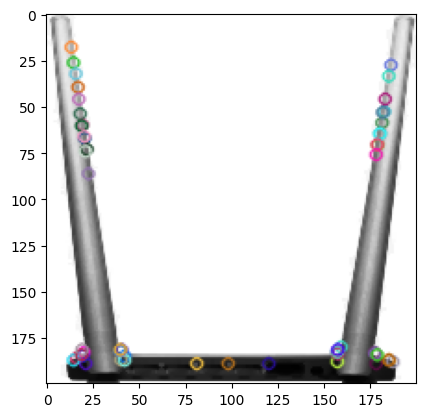

(54, 32)


In [141]:
orb = cv.ORB_create(500,edgeThreshold = 10, patchSize = 10)
test = img_df.iloc[315, -3]
kp, des = orb.detectAndCompute(test, None)
testkp = cv.drawKeypoints(test, kp, test)
plt.imshow(testkp)
plt.show()
print(des.shape)

In [142]:
orb_df = pd.DataFrame()
orb_df['des'] = img_df['L_array'].apply(lambda x: des_img(x, detect='orb'))
orb_img = np.array(orb_df['des'].tolist(), dtype=object)
orb_img_all = np.concatenate(orb_img, axis=0)
print(orb_img_all.shape)
k = int(round(np.sqrt(len(orb_img_all)),0))
print(k)
try:
    clus_orb = load('clus_orb.joblib')
except FileNotFoundError:
    clus_orb = cluster.KMeans(n_clusters=k, random_state = 38)
    clus_orb.fit(orb_img_all)
    dump(clus_orb, 'clus_orb.joblib')
    
orb_df['hist'] = orb_df['des'].apply(lambda x: hist(x, model=clus_orb))

ari_score(orb_df['hist'].tolist())

(477110, 32)
691


E:\Data_Science\Anaconda\envs\tf_gpu\lib\site-packages\sklearn\base.py:288: UserWarning: Trying to unpickle estimator KMeans from version 1.0.2 when using version 1.2.0. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
E:\Data_Science\Anaconda\envs\tf_gpu\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
E:\Data_Science\Anaconda\envs\tf_gpu\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


The ari scores are 0.020634473911105768 for categorie 0 and 0.027193950539775035 for categorie 1.


## VGG16

In [14]:
#sort the images to build the dataset
import shutil
def sort_images(path):
    rename = df.iloc[:, [8,15]]
    #create folders
    for i in rename['product_category_0'].unique():
        os.makedirs(os.path.join(path, i))
    #move images
    for i in rename['product_category_0'].unique():
        for x in list(rename[rename['product_category_0'] == i]['image']):
                get_image = os.path.join(path,x)
                move_image = shutil.move(get_image, os.path.join(path, i))
    return

x = input('Do you want to launch sorting ? [y/n]')
if x == 'y': 
    x = input('What category do you want to launch? [0/1]')
    if x == '0':
        path = 'E:\\Data_Science\\OpenClassRoom\\Projet 6\\Flipkart\\Images_sort2'
        sort_images(path)
    if x == '1':
        path = 'E:\\Data_Science\\OpenClassRoom\\Projet 6\\Flipkart\\Images_sort'
        sort_images(path)
    
    
    

Do you want to launch sorting ? [y/n] n


In [15]:
import tensorflow as tf
#load data with keras
x = input('What classes do you want to classify? [0/1]')
def create_dataset(path):
    data = tf.keras.utils.image_dataset_from_directory(path,
                                                       labels='inferred',
                                                       label_mode='categorical',
                                                       image_size=(224,224),
                                                       batch_size=8,
                                                       subset = 'both',
                                                       validation_split=0.10,
                                                       seed = 38
                                                      )
    full_data = tf.keras.utils.image_dataset_from_directory(path,
                                                       labels='inferred',
                                                       label_mode='categorical',
                                                       image_size=(224,224),
                                                       batch_size=8,
                                                      )
                  
    norm = tf.keras.layers.Rescaling(1./255)
    for i in data:
        i = i.map(lambda x, y: (norm(x), y))
    full_data = full_data.map(lambda x, y: (norm(x), y))
    return data, full_data

if x =='0':
    path = 'E:\\Data_Science\\OpenClassRoom\\Projet 6\\Flipkart\\Images_sort2'
    data, full_data = create_dataset(path)
else: 
    path = 'E:\\Data_Science\\OpenClassRoom\\Projet 6\\Flipkart\\Images_sort'
    data, full_data = create_dataset(path)


What classes do you want to classify? [0/1] 1


Found 1010 files belonging to 37 classes.
Using 909 files for training.
Using 101 files for validation.
Found 1010 files belonging to 37 classes.


### Fine-Tune FC Layers

In [23]:
if tf.config.list_physical_devices('GPU'):
    
    from tensorflow.keras import Sequential, Model
    from keras.applications import vgg16
    from tensorflow.keras import layers
    if x == '0':
        n_classes = 7
    else: n_classes = 37
    #build the augmentations layers
    augment = Sequential(name = 'data_augment')
    augment.add(layers.RandomFlip('horizontal',
                                  input_shape = (224,
                                                224,
                                                3)))
    augment.add(layers.RandomRotation(0.1))
    augment.add(layers.RandomZoom(0.1))

    #build the pre-trained vgg16
    vgg = vgg16.VGG16(weights="imagenet",
                      include_top=False,
                      input_shape=(224, 224, 3)
                     )

    for layer in vgg.layers[:]:
        layer.trainable = False


    #compile the two models and two fcc layers
    model = Sequential(name = 'Finetune_VGG16')

    model.add(augment)
    model.add(vgg)
    model.add(layers.Flatten())
    model.add(layers.Dense(4096,
                           activation='relu'
                          ))
    model.add(layers.Dense(4096,
                           activation='relu',
                           name = 'features'))
    model.add(layers.Dense(n_classes,
                           activation='softmax'))

    # compile model
    model.compile(loss="categorical_crossentropy",
                  optimizer='Adam',
                  metrics=["accuracy"])

    model.summary()
    

    batch_size = 8

    epochs = 10
    # train the model
    history = model.fit(data[0],
                        validation_data = data[1],
                        epochs=epochs,
                        batch_size=batch_size,
                        verbose=2
                       )

    extractor = Model(inputs = model.input, outputs = model.get_layer('features').output)
    vgg_feat = extractor.predict(full_data)
    vgg_feat.shape

ResourceExhaustedError: {{function_node __wrapped__Mul_device_/job:localhost/replica:0/task:0/device:GPU:0}} failed to allocate memory [Op:Mul]

In [18]:
if x == '0':
    try:
        vgg_feat_df0 = pd.DataFrame(vgg_feat)   
        vgg_feat_df0.to_csv('vgg_feat_df0.csv', index = False)
    except NameError:
        vgg_feat = pd.read_csv('vgg_feat_df0.csv')
else:
    try: 
        vgg_feat_df1 = pd.DataFrame(vgg_feat)
        vgg_feat_df1.to_csv('vgg_feat_df1.csv', index = False)
    except NameError:
        vgg_feat = pd.read_csv('vgg_feat_df1.csv')

In [19]:
ari_score(vgg_feat)

E:\Data_Science\Anaconda\envs\tf_gpu\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
E:\Data_Science\Anaconda\envs\tf_gpu\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


The ari scores are -0.0003505797013035054 for categorie 0 and -0.002230918430969212 for categorie 1.


In [20]:
#let's try to reduce the dimension
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
#simple linear pca
pca = PCA(n_components = 0.99)
x_trans = pca.fit_transform(vgg_feat)
print(x_trans.shape)
ari_score(x_trans)

#3d tsne
tsne = TSNE(n_components = 2)
x_trans2 = tsne.fit_transform(vgg_feat)
ari_score(x_trans2)

(1010, 86)
The ari scores are -0.000565106165009664 for categorie 0 and 0.0011011539317291165 for categorie 1.


E:\Data_Science\Anaconda\envs\tf_gpu\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
E:\Data_Science\Anaconda\envs\tf_gpu\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


The ari scores are -0.0013448376942966625 for categorie 0 and -0.0019492472214096162 for categorie 1.


E:\Data_Science\Anaconda\envs\tf_gpu\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
E:\Data_Science\Anaconda\envs\tf_gpu\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


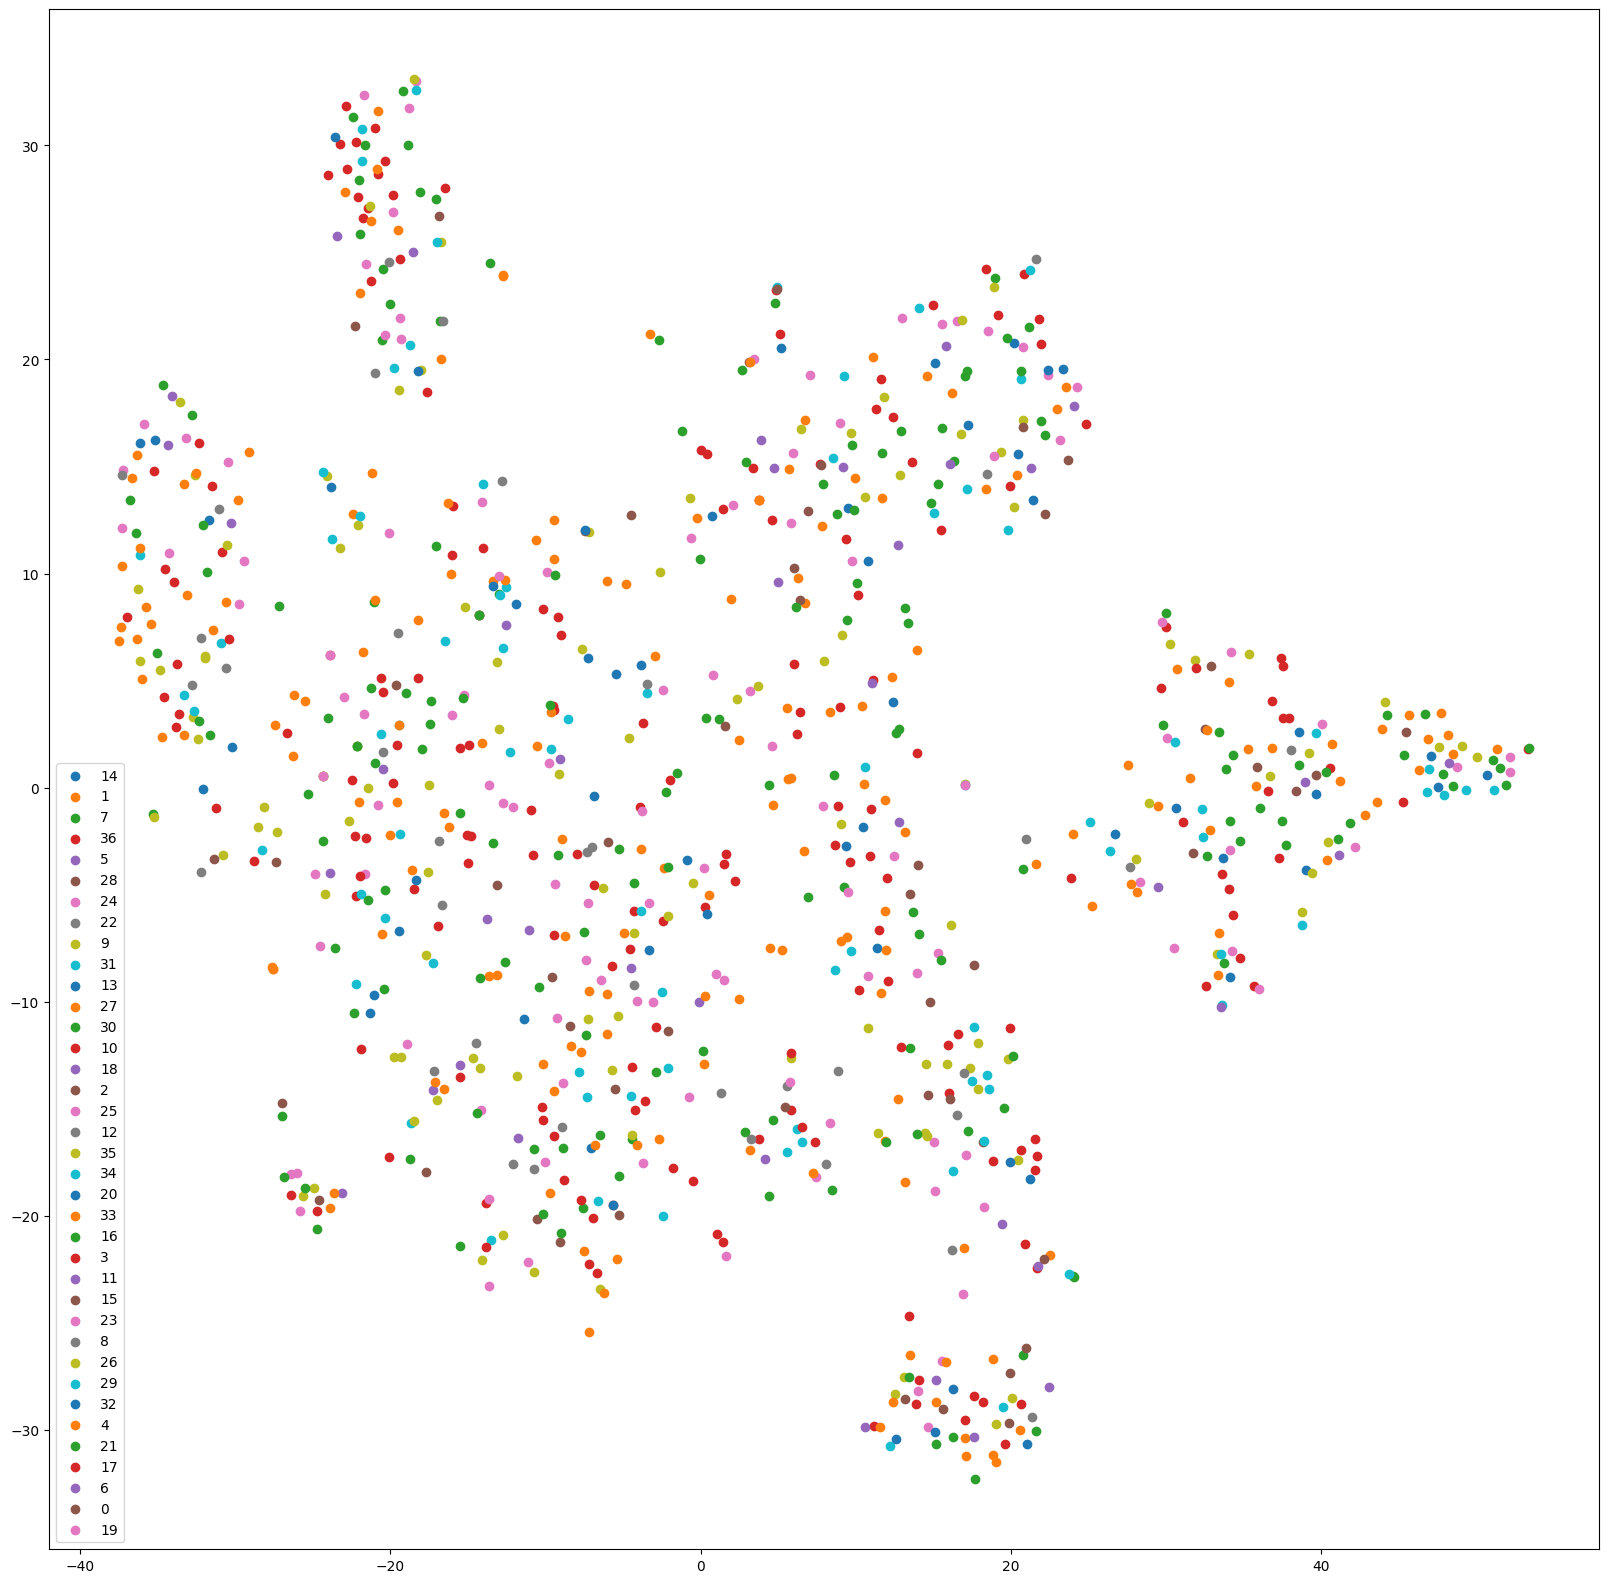

In [21]:
temp = pd.DataFrame(img_df['labels_1'])
temp = temp.join(pd.DataFrame(x_trans2))
fig, ax = plt.subplots(figsize=(20, 20))
for i in temp['labels_1'].unique():
    ax.scatter(temp[0].loc[temp['labels_1'] == i],
               temp[1].loc[temp['labels_1'] == i],
               label=i
               )
plt.legend()
plt.show()

## Combining Bert and VGG16

In [27]:
vgg_feat_df = pd.read_csv('vgg_feat_df.csv')
bert_feat_df = pd.read_csv('features_bert_df.csv')


In [13]:
vgg_feat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Columns: 512 entries, 0 to 511
dtypes: float64(512)
memory usage: 3.9 MB


In [14]:
bert_feat_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008 entries, 0 to 1007
Columns: 768 entries, 0 to 767
dtypes: float64(768)
memory usage: 5.9 MB


In [30]:
combine_df = bert_feat_df.join(vgg_feat_df, how = 'left', lsuffix ='Index')

In [24]:
combine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008 entries, 0 to 1007
Columns: 1280 entries, 0Index to 511
dtypes: float64(1280)
memory usage: 9.8 MB


In [31]:
ari_score(combine_df)

E:\Data_Science\Anaconda\envs\tf_gpu\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
E:\Data_Science\Anaconda\envs\tf_gpu\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


ValueError: Found input variables with inconsistent numbers of samples: [1010, 1008]

In [42]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.98)
x_trans = pca.fit_transform(combine_df)

In [48]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components = 3)
x_trans2 = tsne.fit_transform(combine_df)

E:\Data_Science\Anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
E:\Data_Science\Anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


In [49]:
ari_score(x_trans2)

The ari scores are -0.00046439316942516255 for categorie 0 and 0.00045234319704557437 for categorie 1.


In [50]:
x_trans2.shape

(1008, 3)